In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
cov_df_P0 = pd.read_csv("eval/results/coverage/P0/coverage_results_P0.csv")
cov_df_P1 = pd.read_csv("eval/results/coverage/P1/coverage_results_P1.csv")
cov_df_P2 = pd.read_csv("eval/results/coverage/P2/coverage_results_P2.csv")
cov_df_P3 = pd.read_csv("eval/results/coverage/P3/coverage_results_P3.csv")
cov_df_req = pd.read_csv("eval/results/coverage/requests-functions/coverage_results_requests-functions.csv")

In [4]:
#Build a table

coverage_summary = pd.DataFrame([
    {"strategy": "requests", **cov_df_req.iloc[0].to_dict()},
    {"strategy": "P0", **cov_df_P0.iloc[0].to_dict()},
    {"strategy": "P1", **cov_df_P1.iloc[0].to_dict()},
    {"strategy": "P2", **cov_df_P2.iloc[0].to_dict()},
    {"strategy": "P3", **cov_df_P3.iloc[0].to_dict()},
])

#Normalization metrics because strategies do not have the same amount of tests
coverage_summary["covered_lines_per_test"] = (
    coverage_summary["covered_lines"] / coverage_summary["tests_run"]
)
coverage_summary["coverage_pct_per_test"] = (
    coverage_summary["percent_total_coverage"] / coverage_summary["tests_run"]
)

# Select only what we want to present
coverage_summary = coverage_summary[[
    "strategy",
    "tests_run",
    "percent_line_coverage",
    "percent_branch_coverage",
    "percent_total_coverage",
    "covered_lines_per_test",
    "coverage_pct_per_test",
]].copy()

# Round for readability
coverage_summary = coverage_summary.round({
    "percent_line_coverage": 2,
    "percent_branch_coverage": 2,
    "percent_total_coverage": 2,
    "covered_lines_per_test": 2,
    "coverage_pct_per_test": 3,
})

coverage_summary


,strategy,tests_run,percent_line_coverage,percent_branch_coverage,percent_total_coverage,covered_lines_per_test,coverage_pct_per_test
0,requests,72,63.18,43.33,57.99,19.31,0.805
1,P0,64,42.27,21.54,36.85,14.53,0.576
2,P1,52,35.18,13.72,29.56,14.88,0.569
3,P2,64,48.27,26.92,42.68,16.59,0.667
4,P3,55,44.59,23.33,39.03,17.84,0.710


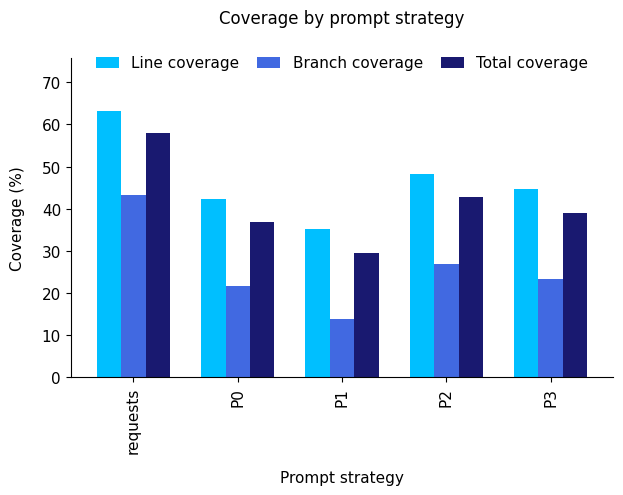

In [5]:
plot_df = coverage_summary.set_index("strategy")[
    ["percent_line_coverage", "percent_branch_coverage", "percent_total_coverage"]
]

colors = ['deepskyblue' , 'royalblue' , 'midnightblue']

fig, ax = plt.subplots(figsize=(7, 4.5))

plot_df.plot(
    kind="bar",
    ax=ax,
    color=colors,
    width=0.7
)

ax.set_ylabel("Coverage (%)", fontsize=11, labelpad=12)
ax.set_xlabel("Prompt strategy", fontsize=11, labelpad=12)
ax.set_title("Coverage by prompt strategy", pad=25)
ax.tick_params(axis="both", which="major", labelsize=11)

# Proportional y-limit (no huge empty space)
y_max = plot_df.max().max()
ax.set_ylim(0, y_max * 1.20)  # 20% headroom

# Legend fits in one line
ax.legend(
    ["Line coverage", "Branch coverage", "Total coverage"],
    loc="upper center",
    bbox_to_anchor=(0.5, 1.05),
    ncol=3,
    frameon=False,
    fontsize=11,
    handlelength=1.5,
    columnspacing=1.2
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.subplots_adjust(top=0.82)

plt.show()


